# 了解RAG 中的 Embedding Vectors

1. 什么是`embedding`
2. Sentence BERT
3. 如何选取`embedding model`

## 什么是`embedding`

考虑一下如何表示“男人” ， “女人”，我们可以从性别上出发，假设男性性别可以表示‘1’ ， 女性性别可以表示为‘9’，即可将“男人” ， “女人”区分开来

那么当加入“男孩” ，“女孩”的时候，单纯靠性别已经无法完全区分上述四个单词，此时可以引入年龄， **"男人"：[1,35] , "女人":[9,35] , "男孩"：[1,10] , "女孩":[9,10]**

In [2]:
! pip install -qU matplotlib

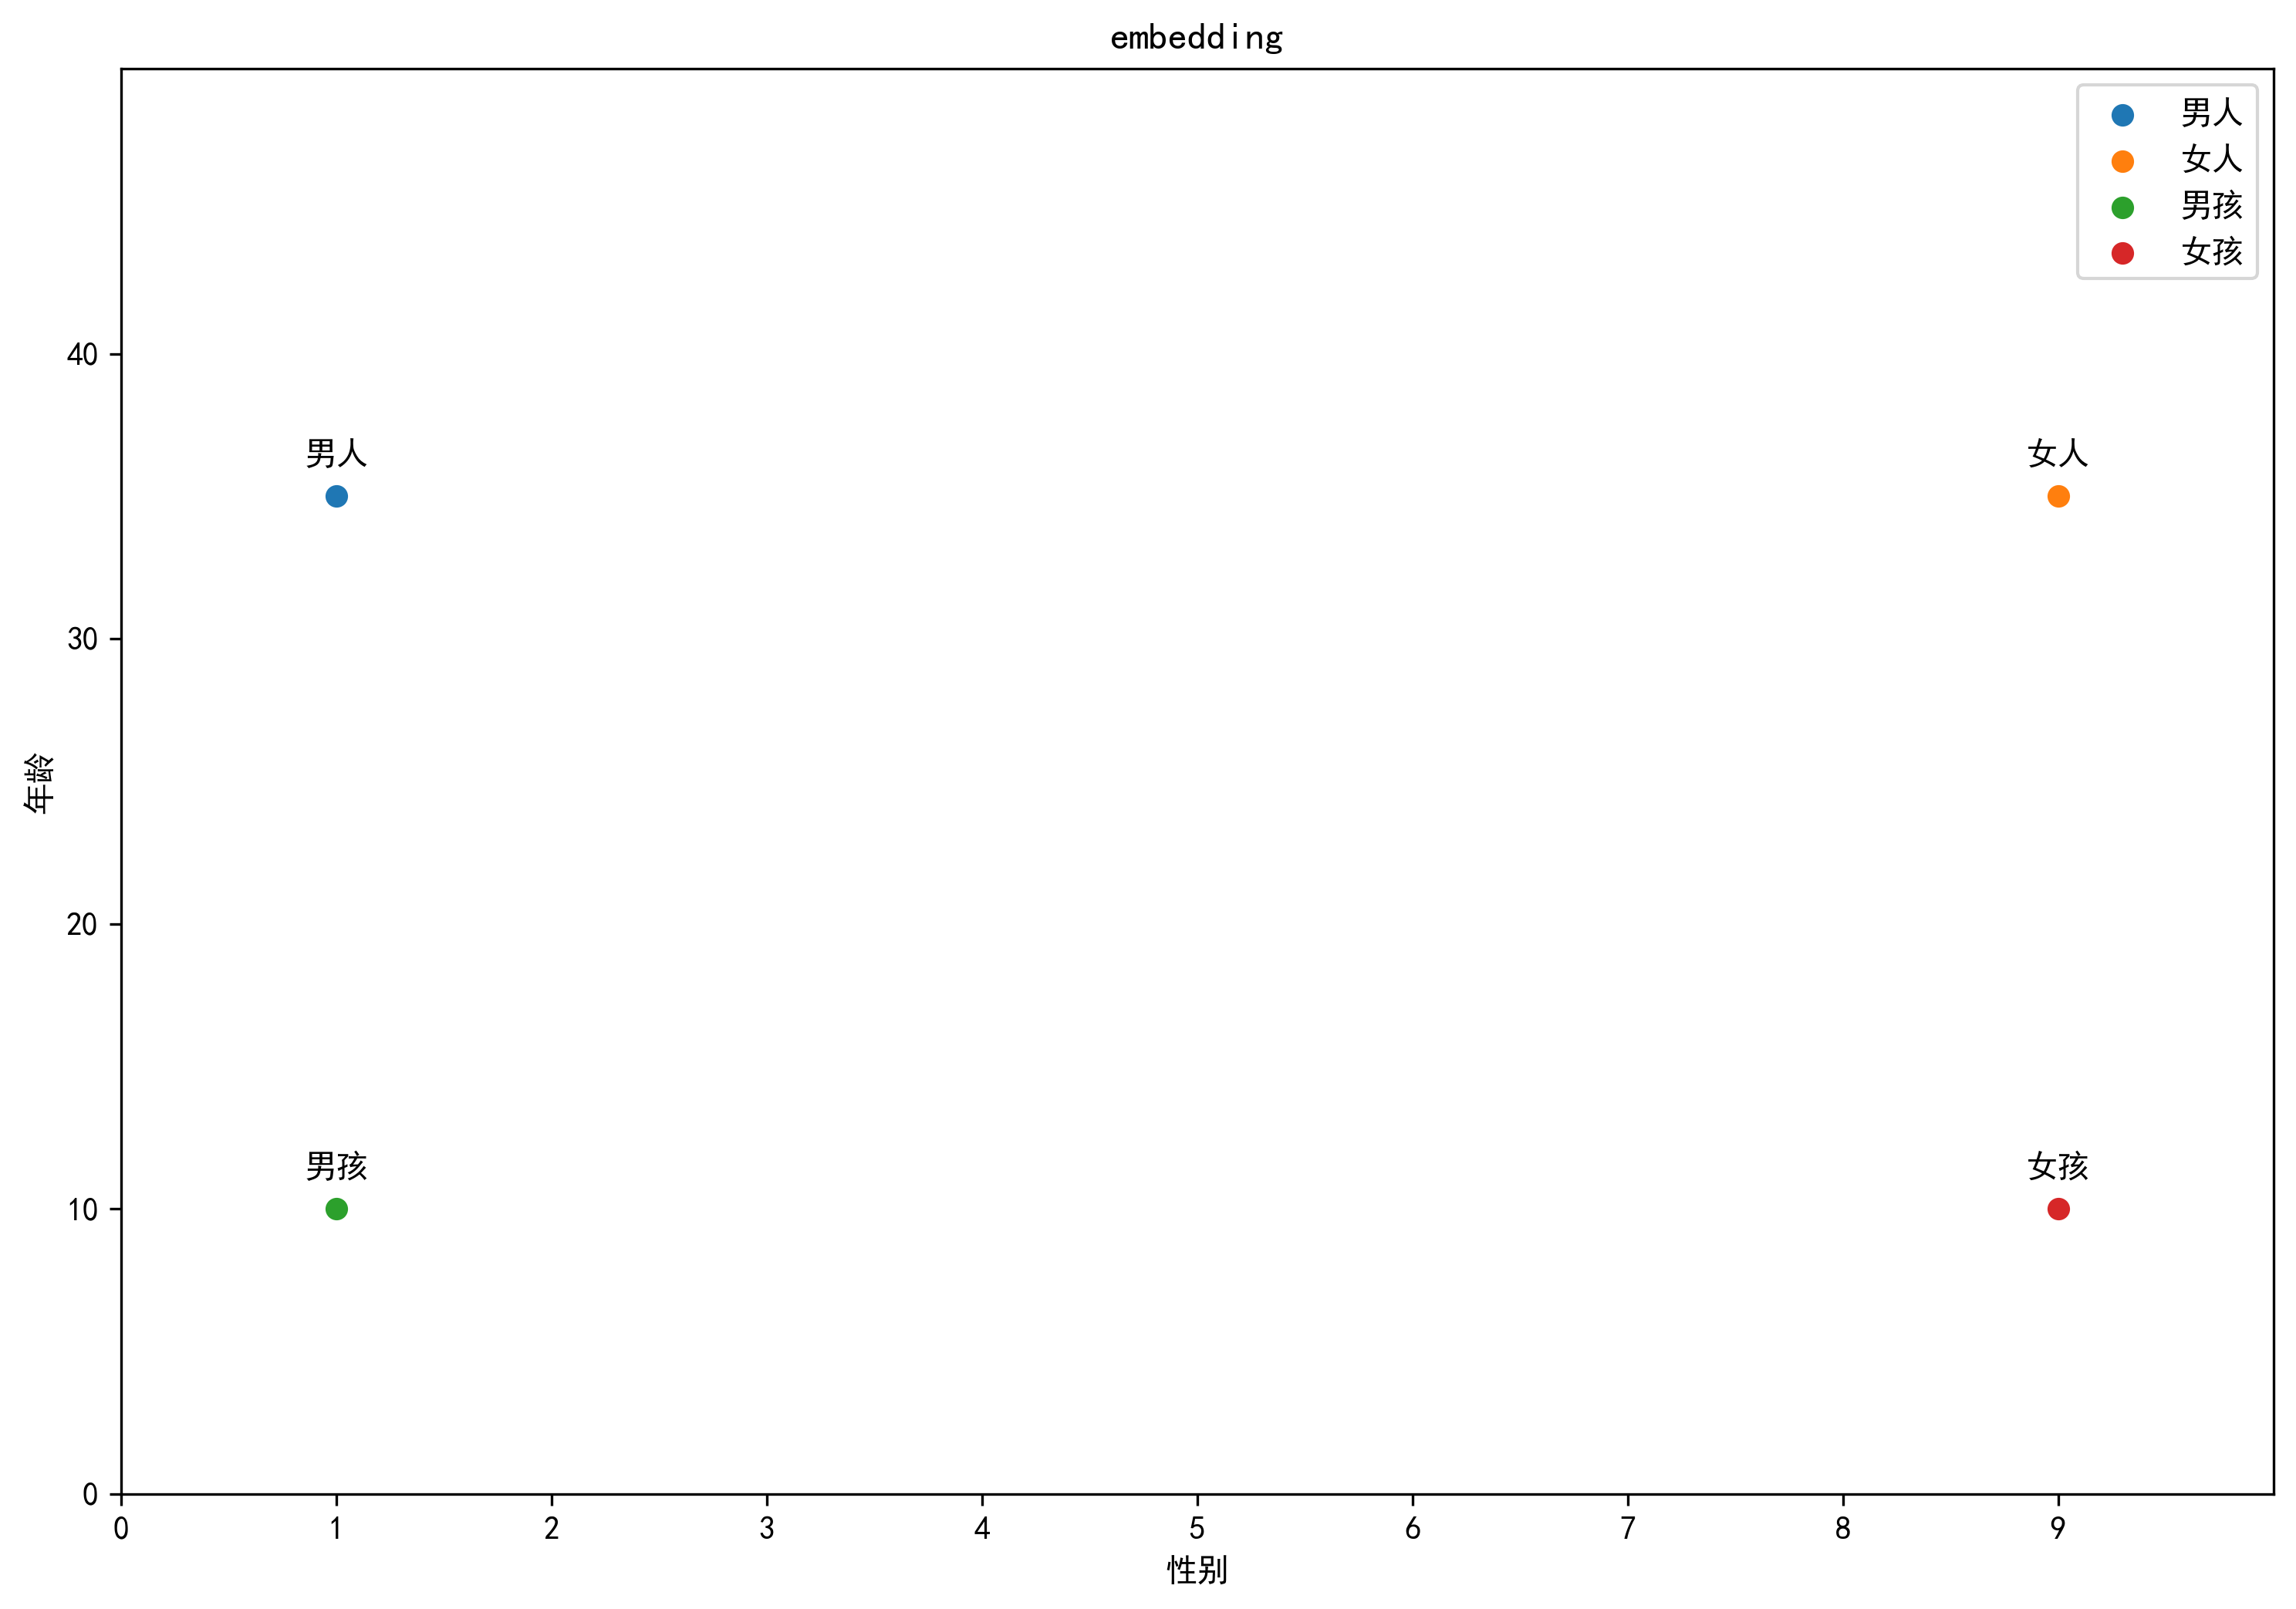

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# rc 代表“运行时配置”（runtime configuration）。
# rcParams 是一个字典对象，它包含了所有用于配置 Matplotlib 图形默认行为的参数。
# 通过修改 rcParams 中的值，我们可以改变图形的样式、尺寸、字体、颜色等，
# 而不必在每个绘图函数中重复设置

# rcParams：matplotlib 的运行时配置参数字典
# 设置matplotlib的rc参数，指定默认的字体为无衬线字体（sans-serif）。
# 这里提供了一个字体列表，首先尝试使用'Kaitt'字体，
# 如果系统中没有这个字体，则尝试使用'SimHei'（黑体）。
# 这样设置可以使得图表中的中文（比如标题、标签等）正常显示，而不出现乱码。
# 这段代码通常放在绘图脚本的开头，确保所有后续的图表都能正确显示中文。
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']

# 设置坐标轴中负号的显示。
# 当使用中文字体时，负号可能会显示为乱码或异常。
# 将axes.unicode_minus设置为False，使得matplotlib使用ASCII中的减号来显示负号，
# 从而避免这个问题。
plt.rcParams['axes.unicode_minus'] = False

# 定义点的坐标和标签
ponits = {
    "男人": [1, 35],
    "女人": [9, 35],
    "男孩": [1, 10],
    "女孩": [9, 10],
}

x_values = [point[0] for point in ponits.values()]
y_values = [point[1] for point in ponits.values()]
labels = list(ponits.keys())

# 创建一个新的图形窗口（Figure对象），并设置其尺寸为宽12英寸、高8英寸。
plt.figure(figsize=(12, 8), dpi=300)
for i, label in enumerate(labels):
    # 绘制散点图
    plt.scatter(x_values[i], y_values[i], label=label)

# 设置x轴和y轴的范围和精度
plt.xlim([0, 10])
plt.ylim([0, 50])
# 设置x轴和y轴的精度
# arange()生成均匀间隔的数值序列
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 50, 10))

# 添加标签
for i, label in enumerate(labels):
    plt.annotate(
        # 要显示的文本内容
        label,
        # 要标注的点的坐标
        (x_values[i], y_values[i]),
        # 配置参数xytext的坐标系统
        # 表示xytext的偏移量是以点（points）为单位
        textcoords="offset points",
        # 标注文本相对于标注点的偏移量，这里表示在y轴方向偏移10个点
        xytext=(0, 10),  
        ha="center" # horizontal alignment 文本水平对齐方式
    )

# 设置图表标题和坐标轴标签
plt.title("embedding")
plt.xlabel("性别")
plt.ylabel("年龄")

# 显示图例
plt.legend()
# 显示图表
plt.show()    


随着词汇的逐渐增加，二维已经不足以区分单词，例如引入新的单词 “国王” ，“皇后”,只靠年龄和性别，已经无法区分国王 —— 男人 ， 皇后———女人

所以我们引入新的特征，例如'皇室的' ，则 **"男人": [1, 35, 1], "女人": [9, 35, 1],"男孩": [1, 10, 1],"女孩": [9, 10, 1],"国王": [1, 35, 9],"皇后": [9, 35, 9]**

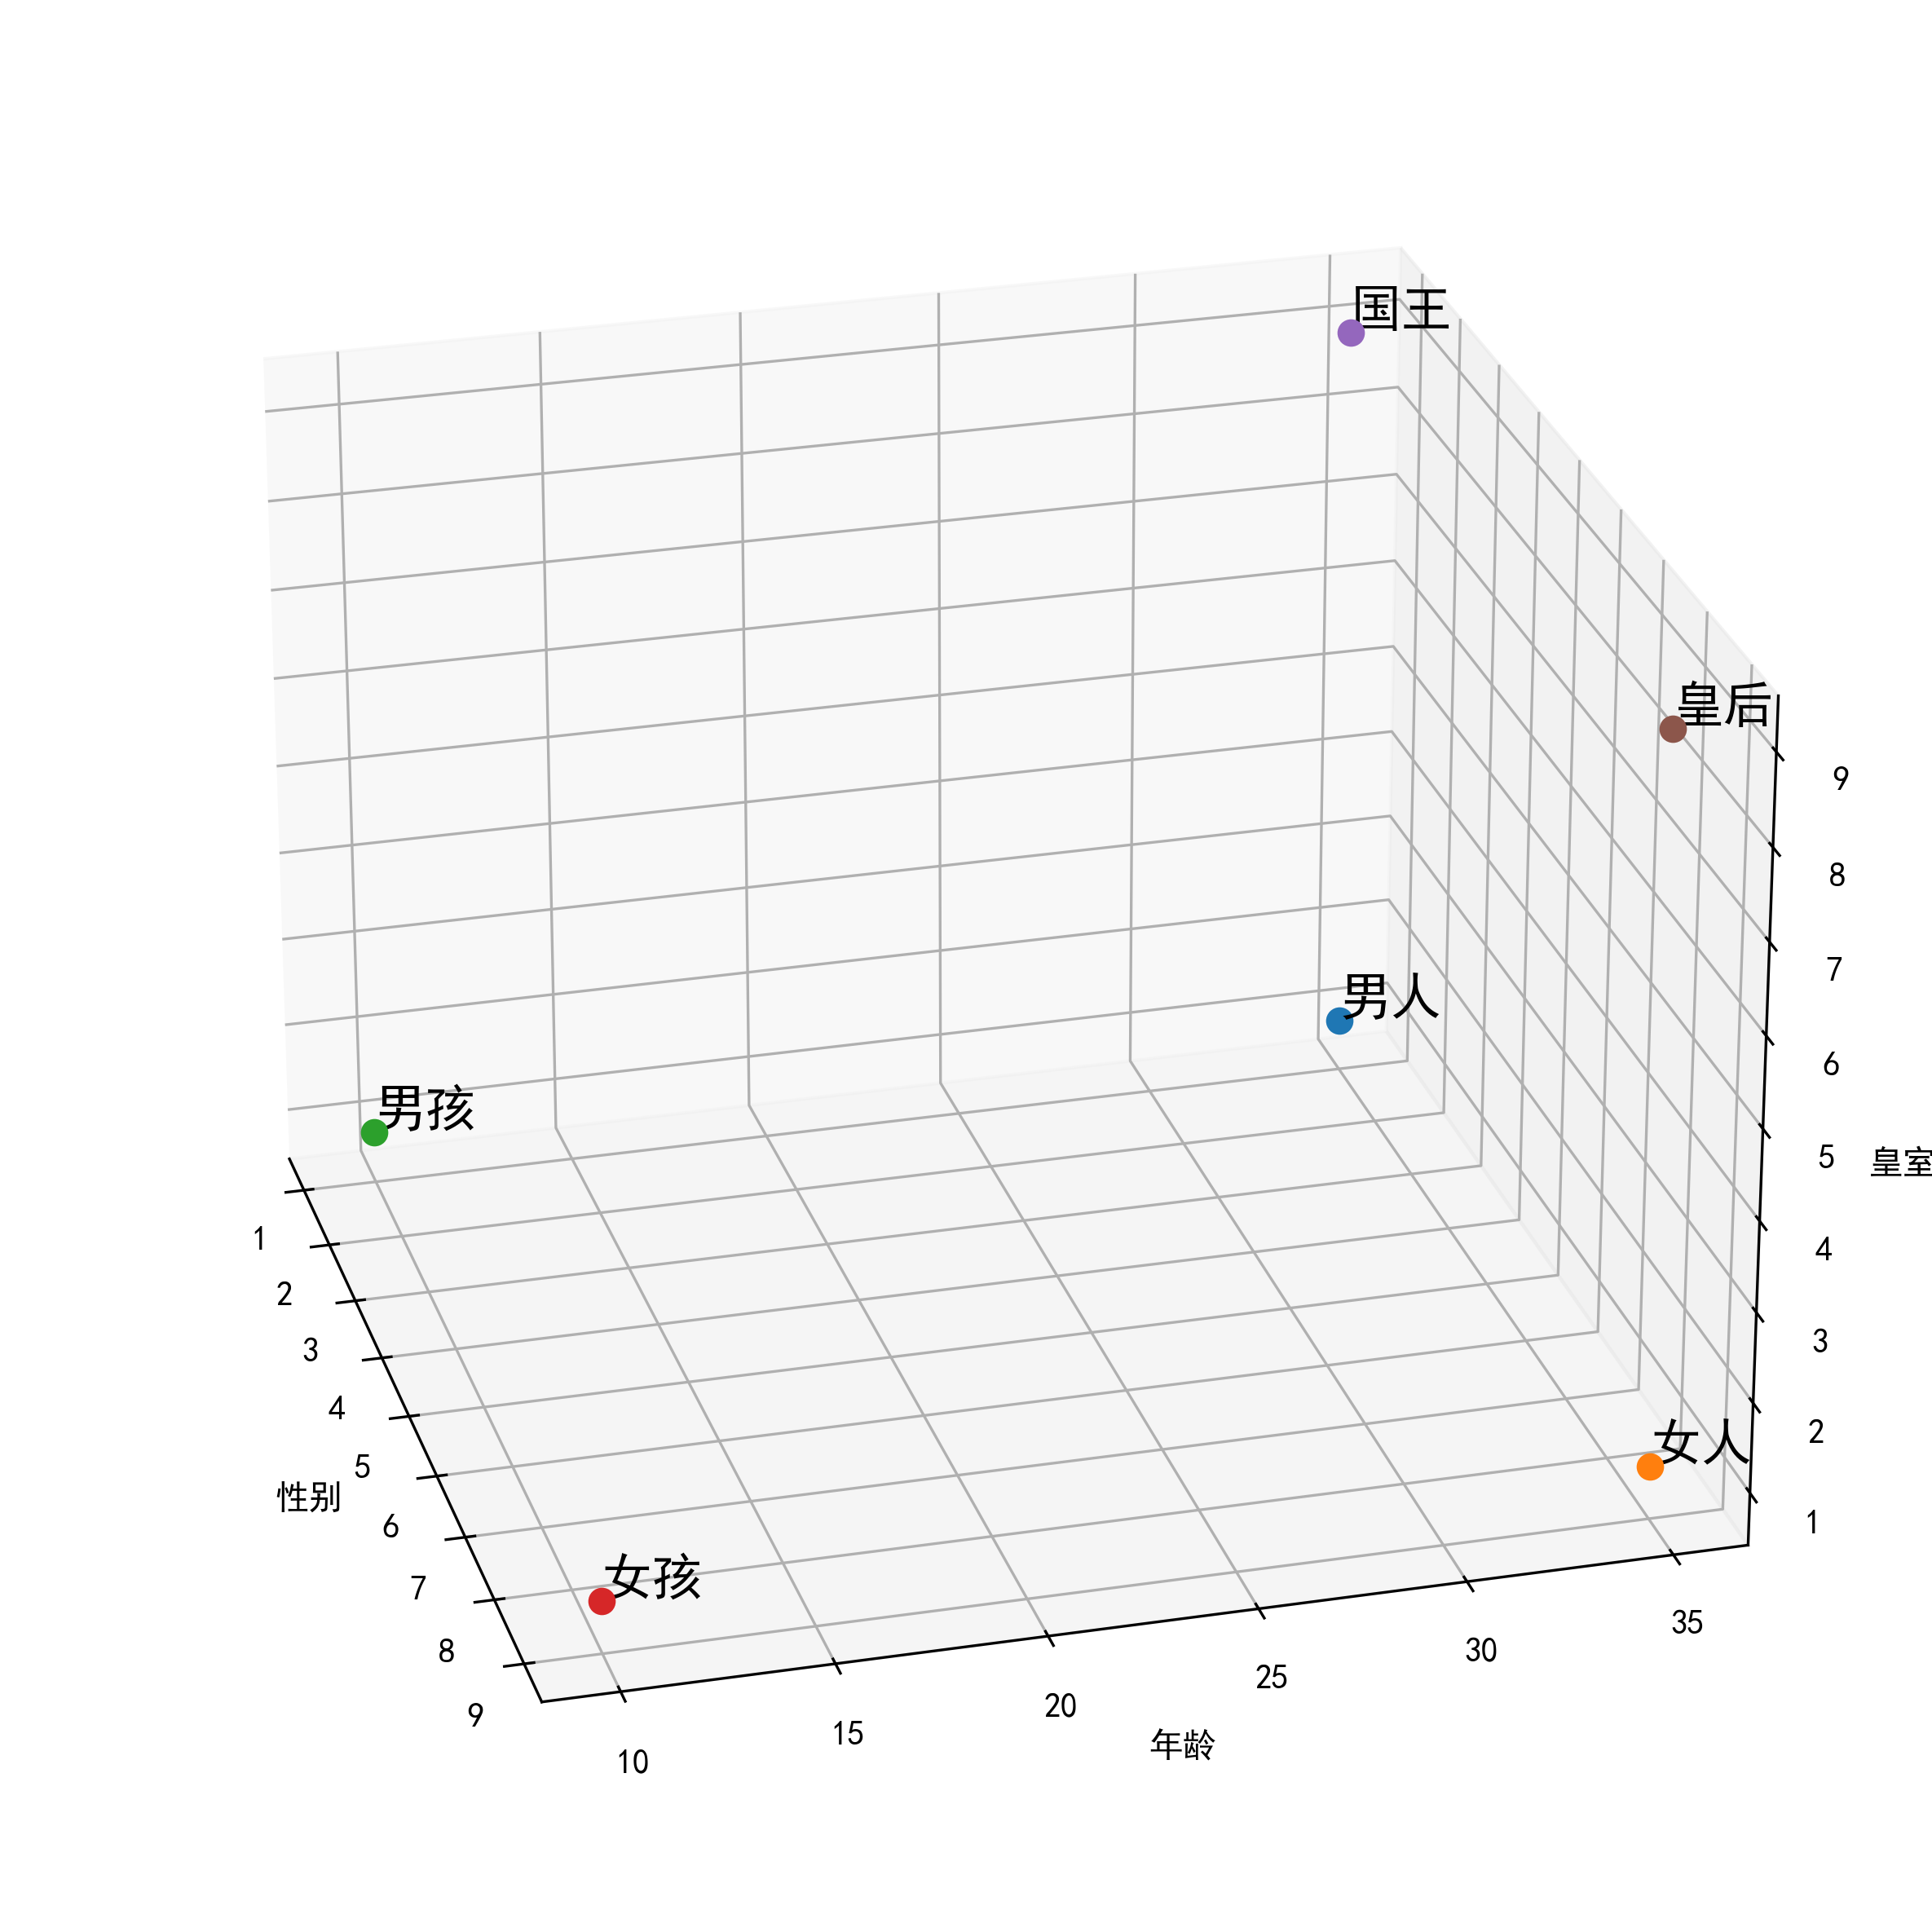

In [4]:
points = {
    "男人": [1, 35, 1],
    "女人": [9, 35, 1],
    "男孩": [1, 10, 1],
    "女孩": [9, 10, 1],
    "国王": [1, 35, 9],
    "皇后": [9, 35, 9]
}

x_coords = [point[0] for point in points.values()]
y_coords = [point[1] for point in points.values()]
z_coords = [point[2] for point in points.values()]
labels = list(points.keys())

# 创建图形和三维坐标轴
fig = plt.figure(figsize=(12, 10), dpi=300)
# add_subplot(行数, 列数, 子图序号)
# 例如：add_subplot(2, 2, 1)
# 将图形窗口分成2行2列，即4个小格子（子图位置）
# 选择第1个小格子作为当前绘图区域
# 绘制子图，一行一列中的第一个
# projection='3d' 用于创建3维坐标系
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    # s表示散点图中点的大小（size）
    ax.scatter(x_coords[i], y_coords[i], z_coords[i], label=label , s=50)

# 为每个点添加标签
for i, label in enumerate(labels):
    ax.text(
        x_coords[i], 
        y_coords[i], 
        z_coords[i], 
        label, 
        fontsize=15, 
        horizontalalignment='left',
        verticalalignment='bottom'
        )


# 设置标签
ax.set_xlabel('性别')
ax.set_ylabel('年龄')
ax.set_zlabel('皇室')

# 调整视角
# elev：仰角，即观察者与XY平面的夹角（单位：度）。
# elev=0表示从侧面看，elev=90表示从正上方看。
# azim：方位角，即观察者围绕Z轴旋转的角度（单位：度）。
# azim=0表示从X轴正向看，azim=90表示从Y轴正向看。
ax.view_init(elev=25., azim= -15)
# 显示图形
plt.show()


# embedding模型选取

## m3e模型

In [5]:
! pip install -qU sentence-transformers hf_xet


In [15]:
from sentence_transformers import SentenceTransformer
import os

model = SentenceTransformer('moka-ai/m3e-base')

#Our sentences we like to encode
sentences =['为什么良好的睡眠对健康至关重要?' ,
        '良好的睡眠有助于身体修复自身,增强免疫系统',
        '在监督学习中，算法经常需要大量的标记数据来进行有效学习',
        '睡眠不足可能导致长期健康问题,如心脏病和糖尿病',
        '这种学习方法依赖于数据质量和数量',
        '它帮助维持正常的新陈代谢和体重控制',
        '睡眠对儿童和青少年的大脑发育和成长尤为重要',
        '良好的睡眠有助于提高日间的工作效率和注意力',
        '监督学习的成功取决于特征选择和算法的选择',
        '量子计算机的发展仍处于早期阶段，面临技术和物理挑战',
        '量子计算机与传统计算机不同，后者使用二进制位进行计算',
        '机器学习使我睡不着觉',
]
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [16]:
len(embeddings)

12

In [17]:
len(embeddings[0])

768

In [18]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

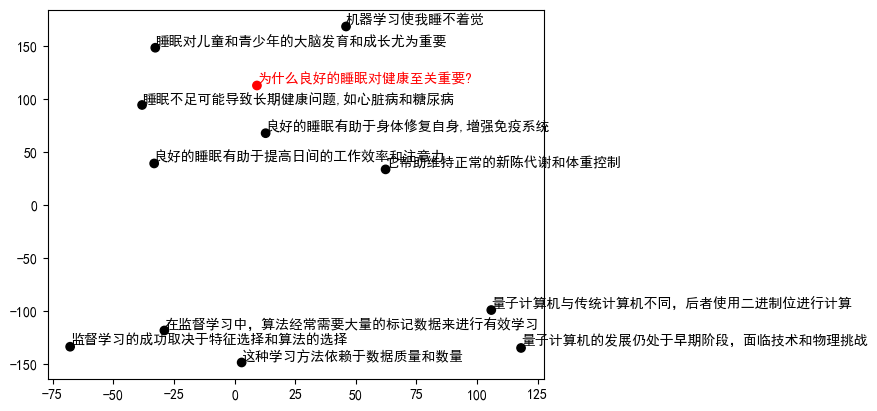

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False


color_list =  ['black'] * len(embeddings_2d[1:])
color_list.insert(0, 'red')

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1] , color=color_list )

for i in range(len(embeddings_2d)):
    plt.text(embeddings_2d[:,0][i], embeddings_2d[:,1][i]+2,  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()

## openai text-embedding-ada-002 embedding模型

In [20]:
! pip install -qU openai

In [10]:
sentences =['为什么良好的睡眠对健康至关重要?' ,
        '良好的睡眠有助于身体修复自身,增强免疫系统',
        '在监督学习中，算法经常需要大量的标记数据来进行有效学习',
        '睡眠不足可能导致长期健康问题,如心脏病和糖尿病',
        '这种学习方法依赖于数据质量和数量',
        '它帮助维持正常的新陈代谢和体重控制',
        '睡眠对儿童和青少年的大脑发育和成长尤为重要',
        '良好的睡眠有助于提高日间的工作效率和注意力',
        '监督学习的成功取决于特征选择和算法的选择',
        '量子计算机的发展仍处于早期阶段，面临技术和物理挑战',
        '量子计算机与传统计算机不同，后者使用二进制位进行计算',
        '机器学习使我睡不着觉',
        ]

### api中转

In [ ]:
from openai import OpenAI

client = OpenAI(
    base_url="****************",
    api_key="**************"  
)
response = client.embeddings.create(
  input=sentences,
  model="openai/text-embedding-ada-002",
)


response.data[0]

Embedding(embedding=[0.026950351893901825, 0.0031270866747945547, 0.01897401362657547, -0.0036709278356283903, 0.01003084797412157, -0.011964505538344383, -0.017161210998892784, 0.003957955166697502, 0.004411156289279461, -0.005015423987060785, -0.02876315638422966, -0.01849059946835041, 0.0006495880661532283, -0.010635116137564182, -0.01836974546313286, 0.014925419352948666, -0.03963997960090637, -0.007734630256891251, 0.00211493787355721, 0.019215721637010574, 0.024291573092341423, 0.001216089352965355, -0.031180227175354958, -0.018611453473567963, 0.02767547406256199, -0.0008912952616810799, -0.012206212617456913, -0.005317558068782091, -0.0257418155670166, 0.026950351893901825, -0.028521448373794556, -0.024895841255784035, -0.00486435741186142, -0.026466937735676765, 0.0032479404471814632, 0.024533279240131378, -0.01510669942945242, 0.012387493625283241, 0.007009508553892374, -0.029488276690244675, -0.002734312554821372, 0.0230830367654562, 0.002991126384586096, 0.00392774166539311

### 官方api

In [ ]:
import openai
import os

openai.api_key = "***************"

response = openai.embeddings.create(
  input=sentences,
  model="text-embedding-ada-002",
)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embeddings_openai = [item.embedding for item in response.data]

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_openai_2d = tsne.fit_transform(np.array(embeddings_openai))

In [17]:
len(embeddings_openai)

12

In [18]:
len(embeddings_openai[0])

4096

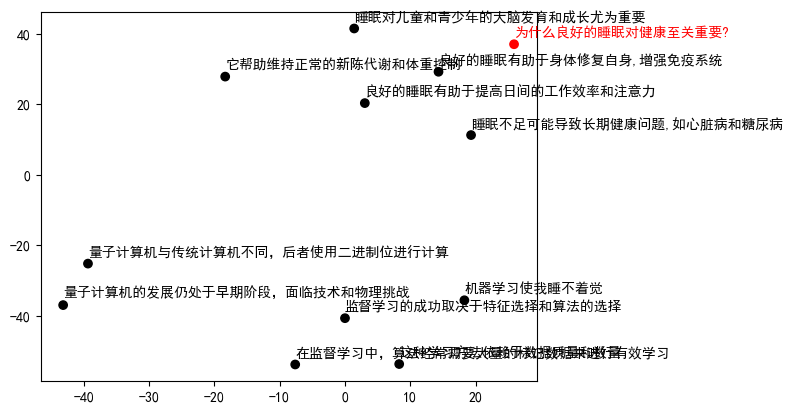

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False


color_list =  ['black'] * len(embeddings_openai_2d[1:]) 
color_list.insert(0, 'red')

plt.scatter(embeddings_openai_2d[:, 0], embeddings_openai_2d[:, 1] , color=color_list )

for i in range(len(embeddings_openai_2d)):
    plt.text(embeddings_openai_2d[:,0][i], embeddings_openai_2d[:,1][i]+2,  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()